# Optimization

As we get into machine learning, we are going to run into some (perhaps) unfamiliar terms such as 
- "optimization" (which is pretty much what it sounds like),
-  "error" (sort of what it sounds like),
-   and "cost" (what it sounds like if you stretch your imagination).

Fear not! Here, we shall unpack these terms so you have both a conceptual and working knowledge of what these concepts are. Then you can either 
- use algorithms you trust that use these terms,
- or you can dig into the details of algorithms that use these terms and see what *you* think.

The term "optimization", as we just said, is almost what is sounds like: we're trying to make something (a machine learning algorithm) the very best that it can be! We want our "model" or our "algorithm" to be the greatest!

But wait! How do we actually define "optimum"? Well, because we (literally, you and me) don't know *everything* there is to know about our data, then whatever we decide is "optimum" is going to be based on *intuition*, which we then turn into math (or Python functions... same thing -- sorry mathematicians).  

## A simple and familiar example of optimization

Let's get the intuition for optimization by looking at a machine learning algorithm that you probably didn't even know was a machine learning algorithm: good ol' linear regression!  
You might be wondering "How is linear regression a machine learning?" Good question! You might think of machine learning algorithms as, for example, classifying pictures of your face from all the other pictues you have. The key is that the machine learning algorithm is *predicting* which faces should be your face, and *predicting* that the other photos aren't. In other words, it is looking at all the values of the pixels in the images, and predicting whether those pixel values - the **data** - are correspond to your face or some other face. Well, this is pretty much what a regression does. A regression takes input data (the x values) and then, for any x we can think of, it makes a *prediction* of what the corresponding y value should be! For example, if we know that average happiness in a country is related to the health of the economy in that country as measured by gross domestic prodect (GDP), then we can predict the average happiness in *any* country, even those countries whose data weren't in the initial regression line.

## Optimization in regression

Let's look at a simple example using made-up (but realistic) data showing how happiness increases with increasing GDP. First, we'll import a couple libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Now let's make up some data:

In [3]:
# Make data
x = np.array([2, 4, 6, 8, 10])                  # GDP values
data = np.array([1.8, 3.3, 3.7, 4.6, 6.7])      # happiness values

... and take a look at them:

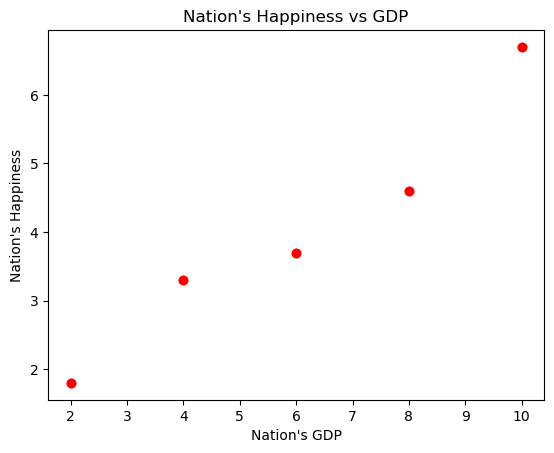

In [9]:
# plot the data values
plt.plot(x, data, 'ro')
plt.plot(x, data, 'ro')
plt.xlabel('Nation\'s GDP')
plt.ylabel('Nation\'s Happiness')
plt.title('Nation\'s Happiness vs GDP')
plt.show()

We can see that happiness does seem to increase with GDP. But can we come up with a good mathematical description of how happiness changes with GDP? If so, then we can use this description – this equation – to predict the overall happiness in any country we want? This is where intuition, thought, and maybe some trial and error come in!

Looking at the data, I'd guess that a straight line with some positive slope might do a decent job of describing these data, so let's try it!

### Note: This is only a guess!  
I don't have any theoretical reason for believing there is a straight-line relationship here; I'm just making a guess based on how the data look to me! I could have chosen any function, but a straight line is one of the simplest functions there is - *y* =  and we all learned it primary school anyway, so let's go with [Occam's razor](https://en.wikipedia.org/wiki/Occam%27s_razor).

So let's make a straight line  and plot it along with the data. First, we'll make an empty array to hold the predictions of our model.


In [10]:
modeldata = np.zeros(data.shape)                # array to hold model data values

Now let's make some guesses for what the slope and y-intercept might be. Note I don't have any secret knowledge about what these values might be (do you?); I'm just making a guess by looking at the data – y seems to increase by about 1 unit when x changes from 2 to 4, for example. So that would be a rise of 1 for a run of 2, corresponding to a slope of rise/run = 1/2 or 0.5.

In [29]:
# Model parameters/coefficients
intercept = 0
slope = 0.5

And now we can make our predicted values:

In [30]:
# Compute model values
for index, x_in in enumerate(x) :
    y_out = intercept + slope*x_in # compute y value for this x
    modeldata[index] = y_out       # and store in our array

And plot them with the data!

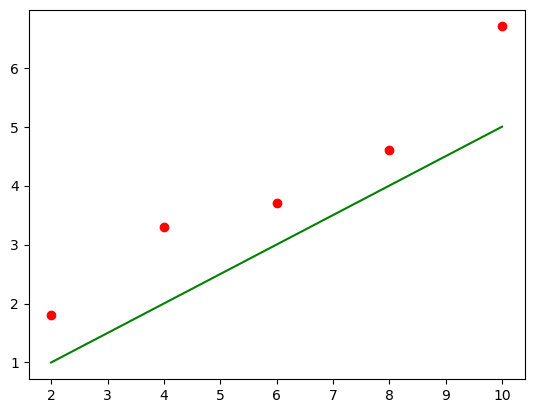

In [32]:
# plot the model values on the same plot as the data
plt.plot(x, data, 'ro')         # data
plt.plot(x, modeldata, 'g-')    # model
plt.show()

What do you think? How should we change the line in order to "optimize" it as a description of the data? Take a moment to ponder that question!

In [22]:
import time as t
a_moment = 5
for i in range(a_moment) :
    print('pondering...')
    t.sleep(1)
print('Done pondering!')
print('The slope looks decent, but the y-intercept needs to be bigger to move the line up towards the data!')

pondering...
pondering...
pondering...
pondering...
pondering...
Done pondering!
The slope looks decent, but the y-intercept needs to be bigger to move the line up towards the data!


Hopefully you agree!  
My thought process, and probably yours, went something like this:
- The line is lower than *all* of the data points by similar amounts
- If I imagine the same line higher up, it would pass through the data rather then being below them
- As a result, all of the predicted values of the new model would be closer to the actual data than the current one

Based on that reasoning, let's change the y-intercept to something bigger:

In [33]:
intercept = 1

Recompute the model values:

In [34]:
# Compute model values
for index, x_in in enumerate(x) :
    y_out = intercept + slope*x_in # compute y value for this x
    modeldata[index] = y_out       # and store in our array

And plot the new model with the data!

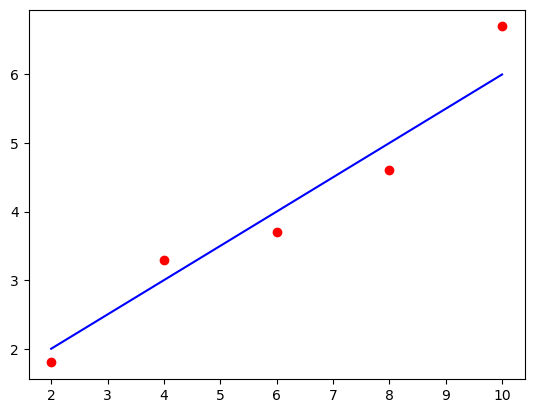

In [35]:
# plot the model values on the same plot as the data
plt.plot(x, data, 'ro')         # data
plt.plot(x, modeldata, 'b-')    # model
plt.show()

Not bad! Take another moment to marvel at our work! I think we can all agree that the new line with the larger y-intercept does a better job of "fitting" the data than the first one. It seems to pass through the data more closely, and it doesn't miss the data points systematically like the first one did, undershooting everything.

But – and here's a big "but" – how good is good enough? Could we change the y-intercept a little and do a little better? Would a slightly higher y-intercept be even more "optimal"? In order to settle this fight, we need to agree on what we mean by an algorithm being "optimal". Once we agree on this definition, we will all arrive at the exact same answer!

## Defining "optimum"

When you see the work "optimum" you might think "There can be only one optimum: whatever it is that is the very very best." You have to let go of that right now and leave it to the philosophers and mathameticians. For our purposes, optimum means the parameter values of our model – in this case the slope and y-intercept – that come closest to all the data values such that *any change would make the model worse*. When you get to the point where any change in your guess for the parameters makes your model worse.

"Optimum" is this case is just the slope and y-intercept that makes the line pass the closest to all the data points – any change from these "optimal" values will make you fit of the data worse.

At this point, we've defined optimum in terms of "better" and "worse", but what does it mean to be a "better" fit or a "worse" fit. We need to define exactly what we mean by this. To do so, we'll introduce the concept of "error" in this context.

In [36]:
## Defining "error"

To calculate how much our model misses the data, we can just calculate how far each predicted misses each data point. Let's compute the errors for an intercept of 0.

In [ ]:
Set our intercept:

In [38]:
intercept = 0

Recompute our model values:

In [39]:
# Compute model values
for index, x_in in enumerate(x) :
    y_out = intercept + slope*x_in
    modeldata[index] = y_out

In [ ]:
And plot!

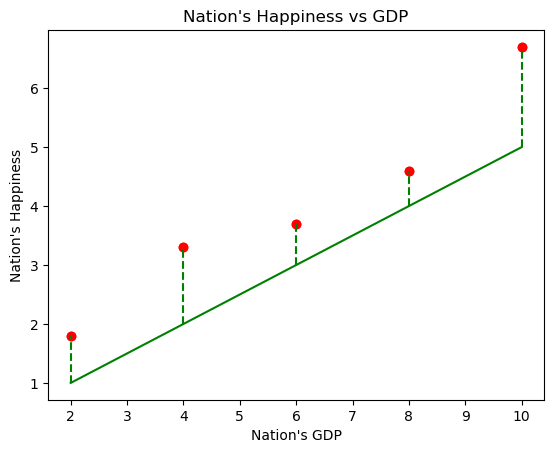

In [46]:
# plot the data values
plt.plot(x, data, 'ro')
plt.xlabel('Nation\'s GDP')
plt.ylabel('Nation\'s Happiness')
plt.title('Nation\'s Happiness vs GDP')

# plot the model values and errors on the same plot as the data
plt.plot(x, data, 'ro')         # data
plt.plot(x, modeldata, 'g-')    # model

# Add vertical lines to represent errors
for i in range(len(x)):
    plt.vlines(x[i], modeldata[i], data[i], colors='g', linestyles='dashed')

plt.show()


The errors are shown by the green dashed line. The size of the error is length of each of these lines, which is just each data value minus each model value:

In [41]:
errors = data - modeldata

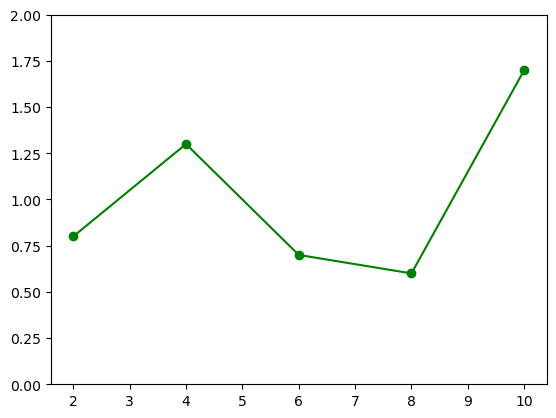

In [51]:
plt.plot(x, errors, 'go-')
plt.ylim([0, 2])
plt.show()

Here we can notice that 1) all the errors are positive, meaning that our model is undershooting all the data, and 2) the errors range in size from about 0.6 or so up to about 1.75. Keep those numbers in your back pocket for a second. Now let's make the same plot of errors for our the better y-intercept and compare them:

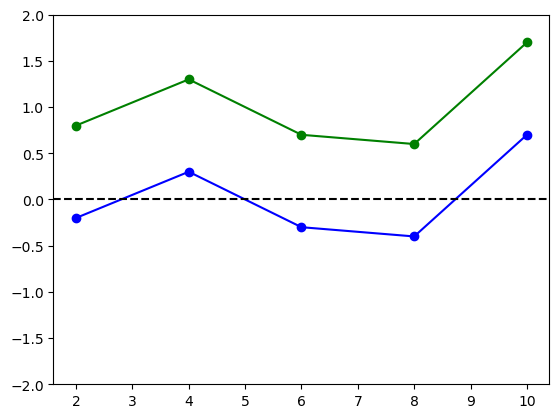

In [52]:
intercept = 1

# Compute model values
for index, x_in in enumerate(x) :
    y_out = intercept + slope*x_in
    modeldata[index] = y_out

better_errors = data - modeldata

plt.plot(x, errors, 'go-')
plt.plot(x, better_errors, 'bo-')
plt.ylim([-2, 2])
plt.axhline(y=0, color='k', linestyle='--')
plt.show()


Note that for the y-intercept of 1 (blue), the errors contain both undershoots and overshoots, and they cluster around zero (the black dashed line) whereas the line with y-intercept of zero (green), overshoots all the values and the *overall values of the errors* are substantially larger (the *largest* error for our blue curve is about the *smallest* error of the green curve!).

How would we summarize the errors for each curve in order to compare them? One thing we could do is just compute the sum of the errors (or their average). The problem with that is that we want to count negative errors the same a positve errors – we don't want them to cancel each other out!  
The common solution to this, which you probably already know, is to square the errors before summing them. This is known as the *summed square errors* or **SSE**. You could also average them, which is known as the *mean squared error* or **MSE**.  
In machine learning, such an overall error metric is called the **cost**.

**cost**: a single number summary of the errors between model and data. Everybody loves money, so our goal is to find the cheapest possible line – the one that has the lowest *cost*.

Since cost is a number directly calculated from the errors, we can now say that the "optimal" solution – the best line that describes our data – is the one that yields the lowest cost. The process of finding this lowest cost is called *minimization*. There are tons of algorithms tailored to do minimization, many of them quite fancy using theorems from calculus and whatnot but – don't worry! – it's not hard to get the basic idea!  
To get this idea, let's plot the cost of various straight lines with different y-intercepts (let's assume that we have the slope correct for simplicity so we don't have to worry about it).  
Here's code to do that – look through it, and then run it to see the plot!

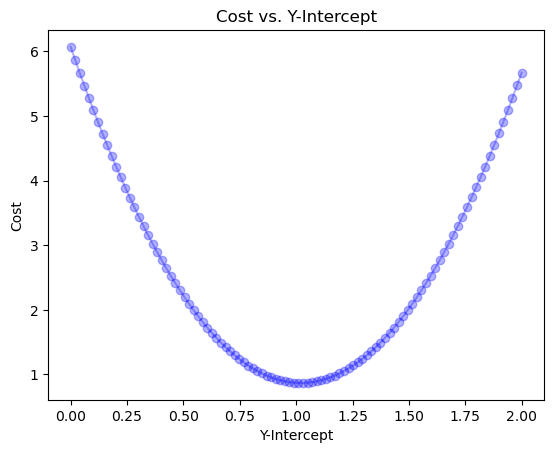

In [62]:
'''
Compute the cost for various y-intercepts and plot the cost vs. y-intercept result
'''

# Make data
x = np.array([2, 4, 6, 8, 10])                  # x values
data = np.array([1.8, 3.3, 3.7, 4.6, 6.7])      # data values

# number of intercepts to try
num_intercepts = 100
int_range = [0, 2]
# Model parameters/coefficients
slope = 0.5                          # slope is constant - we're assuming we have it right
intercepts = np.linspace(int_range[0], int_range[1], num_intercepts)  # make num_intercepts y-intercepts

costs = []    # empty array to hold the costs

# Loop over intercepts and compute cost
for intercept in intercepts:             # loop through the candidate intercepts
    modeldata = intercept + slope * x    # compute the model predictions
    errors = data - modeldata            # ... and the errors
    cost = np.sum(errors**2)             # compute cost as SSE
    costs.append(cost)                   # store the cost for this y-intercept

# Plot cost vs. y-intercept
plt.plot(intercepts, costs, 'b-o', alpha = 0.3)
plt.xlabel('Y-Intercept')
plt.ylabel('Cost')
plt.title('Cost vs. Y-Intercept')
plt.show()

To get the minimum cost, we can use NumPy's `min()` function:

In [59]:
print(f'the minimum cost is {np.min(costs)}')

the minimum cost is 0.8684899500051018


And to get the y-intercept at which the minumum occurs, we can use NumPy's handy `argmin()` function, which returns the index at which the minumum occurs. We can then use this index to grab the corresponding intercept:

In [60]:
print(f'the y-intercept for the minimum cost is {intercepts[np.argmin(costs)]}')

the y-intercept for the minimum cost is 1.0101010101010102


Thus, it seems like our guess of "1" for the intercept that we made above wasn't too bad. Based on the candidate intercepts, the winner was 1.0101, which is pretty darn close to 1. 

In [61]:
2/100

0.02

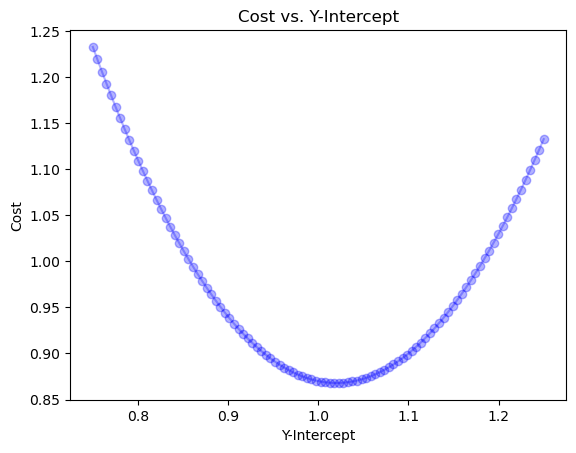

In [63]:
'''
Compute the cost for various y-intercepts and plot the cost vs. y-intercept result
'''

# Make data
x = np.array([2, 4, 6, 8, 10])                  # x values
data = np.array([1.8, 3.3, 3.7, 4.6, 6.7])      # data values

# number of intercepts to try
num_intercepts = 100
int_range = [0.75, 1.25]             # this is the only change from above!
# Model parameters/coefficients
slope = 0.5                          # slope is constant - we're assuming we have it right
intercepts = np.linspace(int_range[0], int_range[1], num_intercepts)  # make num_intercepts y-intercepts

costs = []    # empty array to hold the costs

# Loop over intercepts and compute cost
for intercept in intercepts:             # loop through the candidate intercepts
    modeldata = intercept + slope * x    # compute the model predictions
    errors = data - modeldata            # ... and the errors
    cost = np.sum(errors**2)             # compute cost as SSE
    costs.append(cost)                   # store the cost for this y-intercept

# Plot cost vs. y-intercept
plt.plot(intercepts, costs, 'b-o', alpha = 0.3)
plt.xlabel('Y-Intercept')
plt.ylabel('Cost')
plt.title('Cost vs. Y-Intercept')
plt.show()

In [64]:
print(f'the minimum cost is {np.min(costs)}')

the minimum cost is 0.8680269870421389


In [65]:
print(f'the y-intercept for the minimum cost is {intercepts[np.argmin(costs)]}')

the y-intercept for the minimum cost is 1.0176767676767677
